<a href="https://colab.research.google.com/github/sihyun10/Deeplearning_class/blob/main/deeplearning%5B10%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#CIFAR-10 영상 분류하기
#라이브러리와 데이터 셋 불러오기

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import *

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
#합성곱 신경망 모델 구성하기

#영상의 픽셀 값을 0에서 1 사이로 변환
X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
model = Sequential()
model.add(Conv2D(64,activation='relu',kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,activation='relu',kernel_size=(3,3)))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(80,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [5]:
#합성곱 신경망 모델 컴파일 및 학습하기
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit(X_train,y_train,epochs=10,verbose=1,validation_split=0.3)

Epoch 1/10
1094/1094 [==============================] - 76s 69ms/step - loss: 1.5279 - accuracy: 0.4505 - val_loss: 1.3653 - val_accuracy: 0.5199
Epoch 2/10
1094/1094 [==============================] - 74s 68ms/step - loss: 1.1735 - accuracy: 0.5861 - val_loss: 1.1389 - val_accuracy: 0.5972
Epoch 3/10
1094/1094 [==============================] - 73s 66ms/step - loss: 1.0367 - accuracy: 0.6363 - val_loss: 1.0636 - val_accuracy: 0.6302
Epoch 4/10
1094/1094 [==============================] - 72s 66ms/step - loss: 0.9426 - accuracy: 0.6684 - val_loss: 1.0640 - val_accuracy: 0.6299
Epoch 5/10
1094/1094 [==============================] - 74s 67ms/step - loss: 0.8627 - accuracy: 0.6979 - val_loss: 1.0504 - val_accuracy: 0.6388
Epoch 6/10
1094/1094 [==============================] - 73s 66ms/step - loss: 0.7902 - accuracy: 0.7249 - val_loss: 1.0321 - val_accuracy: 0.6484
Epoch 7/10
1094/1094 [==============================] - 75s 69ms/step - loss: 0.7273 - accuracy: 0.7458 - val_loss: 1.0226 -

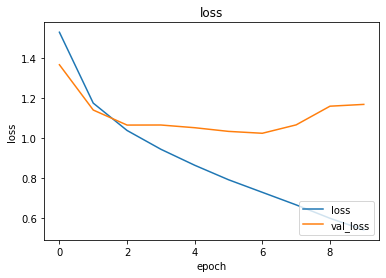

In [6]:
#손실값을 그래프로 그려보기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'],loc='lower right')
plt.show()

313/313 [==============================] - 5s 15ms/step
정답= [3]
예측값= [6.7402015e-04 3.6392277e-05 4.1498826e-03 8.0381632e-01 1.1747533e-03
 1.4333172e-01 1.3957767e-02 1.8050852e-03 2.7082175e-02 3.9718826e-03]


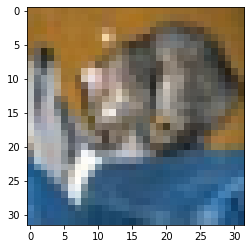

In [7]:
#합성곱 신경망 모델 성능 평가하기
plt.figure()
plt.imshow(X_test[0])
y_pred = model.predict(X_test)
print("정답=",y_test[0])
print("예측값=",y_pred[0])

In [8]:
#CNN 모델 성능 개선하기
#데이터 증대 : 한정된 데이터에서 여러 가지로 변형된 데이터를 생성하는 기법

#라이브러리와 데이터셋 불러오기
import tensorflow as tf
import matplotlib.pyplot as plot
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [9]:
from google.colab import files
uploaded = files.upload()

Saving gori.jpg to gori.jpg


In [10]:
image = load_img("gori.jpg")
array = img_to_array(image)
sample = expand_dims(array,axis=0)

In [11]:
#ImageDataGenerator() 를 이용하여 영상 변형을 정의하기

from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=90,brightness_range=[0.8,1.0],
                             width_shift_range=0.2, zoom_range=[0.8,1.2],
                             height_shift_range = 0.2)

In [12]:
#데이터 증대
#ImageDataGenerator()를 이용하여 영상 변형을 정의하기
#ImageDataGenerator로부터 객체 생성하기

obj = datagen.flow(sample, batch_size = 1)
fig = plt.figure(figsize=(100,20))

<Figure size 7200x1440 with 0 Axes>

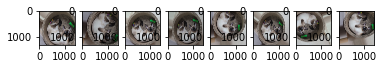

In [13]:
for i in range(8):
  plt.subplot(1,8,i+1)
  image = obj.next()
  plt.imshow(image[0])

In [ ]:
#ImageDataGenerator 출력 : Python의 Generator 형식
#영상을 생성하는 Generator 객체 생성
#Generator : next()가 호출되면 변형된 영상을 하나씩 보내게 됨.

#Transfer Learning

#가중치 저장과 전이 학습
#가중치 저장 : 이미 학습된(Pre-trained) 모델의 가중치를 저장하거나, 
#              필요할 때마다 가중치를 불러온 신경망을 이용해 예측할 수 있다.
#저장 : model.save('mymodel')
#저장되는 정보 : 신경망 모델의 아키텍처 및 구성, 신경망 모델의 컴파일 정보, 훈련 중에 학습된 모델의 가중치 값,
#저장되는 정보 : Optimizer와 현재 상태(훈련을 중단한 곳에서 다시 시작하기 위한 목적)

In [14]:
#CNN 모델 성능 개선하기
#가중치 저장
#Pre_trained 모델 구성하기

import numpy as np
import tensorflow as tf

In [15]:
#난수로 훈련 예제 만들기
test_input = np.random.random((128,32))
test_target = np.random.random((128,1))

In [16]:
#입력 32, 출력 1 노드인 신경망 모델 구성
inputs = tf.keras.Input(shape=(32,))
outputs = tf.keras.layers.Dense(1)(inputs)
model = tf.keras.Model(inputs,outputs)
model.compile(optimizer="adam",loss="mean_squared_error")

In [17]:
#신경망을 3번 학습
model.fit(test_input,test_target,epochs=3)

Epoch 1/3
4/4 [==============================] - 0s 3ms/step - loss: 0.3979
Epoch 2/3
4/4 [==============================] - 0s 3ms/step - loss: 0.3450
Epoch 3/3
4/4 [==============================] - 0s 3ms/step - loss: 0.3043


In [18]:
#Pre-trained 모델 구성하기

#학습한 모델을 저장
model.save("my_model")

In [19]:
#저장한 모델 불러오기
saved_model=tf.keras.models.load_model("my_model")

In [20]:
#저장한 모델 다시 학습하기
saved_model.fit(test_input, test_target, epochs = 3)

Epoch 1/3
4/4 [==============================] - 0s 3ms/step - loss: 0.2734
Epoch 2/3
4/4 [==============================] - 0s 4ms/step - loss: 0.2485
Epoch 3/3
4/4 [==============================] - 0s 3ms/step - loss: 0.2351


In [21]:
#전이학습(Transfer Learning)
# : 하나의 문제에 관해 학습한 신경망의 모델과 가중치를 새로운 문제에 적용하는 것

#keras는 사전 훈련된(Pre-trained) 딥러닝 모델들을 제공
#Keras Applications

#<전략>
#1. 사전 훈련된 모델을 내 프로젝트에 맞게 재정의하기
#2. 다른 히든레이어를 내꺼에 사용한다.
#3. 잘 학습된 입력데이터를 평가에 넣는다.

In [22]:
#전이 학습 수행하기
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [23]:
model = ResNet50(weights = 'imagenet')

102967424/102967424 [==============================] - 4s 0us/step


In [24]:
img_path = 'gori.jpg'

#영상 크기 변경 및 적재
img = image.load_img(img_path, target_size = (224,224))

In [25]:
x = image.img_to_array(img)  #영상을 Numpy 배열로 변환
x = np.expand_dims(x,axis=0)  #하나의 차원을 확장(Batch Size 필요)
x = preprocess_input(x)  #ResNet50이 요구하는 전처리 수행

In [26]:
#전이 학습 수행하기
preds = model.predict(x)
print("예측 :", decode_predictions(preds,top=3)[0])

35363/35363 [==============================] - 0s 0us/step
예측 : [('n02123597', 'Siamese_cat', 0.99999917), ('n02443484', 'black-footed_ferret', 2.2624464e-07), ('n02110958', 'pug', 1.2677384e-07)]
